# Santander Customer Satisfaction

## load data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

cust_df = pd.read_csv('./train.csv', encoding='latin-1')
print(f'dataset shape: {cust_df.shape}')
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


## 전처리

In [4]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print(f'unsatisfied 비율은: {(unsatisfied_cnt/total_cnt):.2f}')

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은: 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [7]:
# var3 피처값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print(f'피처 데이터 shape: {X_features.shape}')

피처 데이터 shape: (76020, 369)


## train_test_split

In [8]:
# train, test .비율이 비슷해야한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)# stratify=labels => train, test비율을 맞춰준다.

train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 Shape: {X_train.shape}, 테스트 세트 Shape: {X_test.shape}')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print(f'\n테스트 세트 레이블 값 분호 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape: (60816, 369), 테스트 세트 Shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분호 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBClassifier(gpu)

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, random_state=156, tree_method='gpu_hist', predictor='gpu_predictor')

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)], )

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82067	validation_1-auc:0.81389
[1]	validation_0-auc:0.83395	validation_1-auc:0.82728
[2]	validation_0-auc:0.83757	validation_1-auc:0.82825
[3]	validation_0-auc:0.84464	validation_1-auc:0.83140
[4]	validation_0-auc:0.84787	validation_1-auc:0.83360
[5]	validation_0-auc:0.85316	validation_1-auc:0.83503
[6]	validation_0-auc:0.85553	validation_1-auc:0.83477
[7]	validation_0-auc:0.85785	validation_1-auc:0.83629
[8]	validation_0-auc:0.86068	validation_1-auc:0.83674
[9]	validation_0-auc:0.86267	validation_1-auc:0.83948
[10]	validation_0-auc:0.86560	validation_1-auc:0.83942
[11]	validation_0-auc:0.86917	validation_1-auc:0.83952
[12]	validation_0-auc:0.87171	validation_1-auc:0.83986
[13]	validation_0-auc:0.87410	validation_1-auc:0.83952
[14]	validation_0-auc:0.87712	validation_1-auc:0.83946
[15]	validation_0-auc:0.87922	validation_1-auc:0.84042
[16]	validation_0-auc:0.88118	validation_1-auc:0.84002
[17]	validation_0-auc:0.88230	validation_1-auc:0.83985
[18]	validation_0-au

## GridSearchCV XGBClassifier

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=500)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
print(f'GridSearchCV 최적 파라미터: {gridcv.best_params_}')

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84625	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85326	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86256	validation_1-auc:0.83932
[17]	validation_0-auc:0.86398	validation_1-auc:0.83871
[18]	validation_0-au

[15]	validation_0-auc:0.86262	validation_1-auc:0.84069
[16]	validation_0-auc:0.86438	validation_1-auc:0.84129
[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-auc:0.86660	validation_1-auc:0.84019
[19]	validation_0-auc:0.86816	validation_1-auc:0.83925
[20]	validation_0-auc:0.86872	validation_1-auc:0.83902
[21]	validation_0-auc:0.86926	validation_1-auc:0.83853
[22]	validation_0-auc:0.87020	validation_1-auc:0.83887
[23]	validation_0-auc:0.87138	validation_1-auc:0.83898
[24]	validation_0-auc:0.87192	validation_1-auc:0.83943
[25]	validation_0-auc:0.87267	validation_1-auc:0.83958
[26]	validation_0-auc:0.87390	validation_1-auc:0.83941
[27]	validation_0-auc:0.87466	validation_1-auc:0.83954
[28]	validation_0-auc:0.87477	validation_1-auc:0.83958
[29]	validation_0-auc:0.87518	validation_1-auc:0.83951
[30]	validation_0-auc:0.87583	validation_1-auc:0.83913
[31]	validation_0-auc:0.87665	validation_1-auc:0.83859
[32]	validation_0-auc:0.87711	validation_1-auc:0.83895
[33]	valid

[15]	validation_0-auc:0.86035	validation_1-auc:0.84141
[16]	validation_0-auc:0.86170	validation_1-auc:0.84277
[17]	validation_0-auc:0.86261	validation_1-auc:0.84241
[18]	validation_0-auc:0.86332	validation_1-auc:0.84189
[19]	validation_0-auc:0.86468	validation_1-auc:0.84155
[20]	validation_0-auc:0.86554	validation_1-auc:0.84142
[21]	validation_0-auc:0.86602	validation_1-auc:0.84093
[22]	validation_0-auc:0.86679	validation_1-auc:0.84153
[23]	validation_0-auc:0.86744	validation_1-auc:0.84176
[24]	validation_0-auc:0.86781	validation_1-auc:0.84101
[25]	validation_0-auc:0.86901	validation_1-auc:0.84009
[26]	validation_0-auc:0.87031	validation_1-auc:0.84028
[27]	validation_0-auc:0.87125	validation_1-auc:0.84040
[28]	validation_0-auc:0.87151	validation_1-auc:0.84015
[29]	validation_0-auc:0.87236	validation_1-auc:0.83980
[30]	validation_0-auc:0.87280	validation_1-auc:0.83951
[31]	validation_0-auc:0.87337	validation_1-auc:0.83966
[32]	validation_0-auc:0.87373	validation_1-auc:0.83976
[33]	valid

[17]	validation_0-auc:0.86332	validation_1-auc:0.84205
[18]	validation_0-auc:0.86406	validation_1-auc:0.84200
[19]	validation_0-auc:0.86509	validation_1-auc:0.84225
[20]	validation_0-auc:0.86583	validation_1-auc:0.84202
[21]	validation_0-auc:0.86649	validation_1-auc:0.84154
[22]	validation_0-auc:0.86789	validation_1-auc:0.84130
[23]	validation_0-auc:0.86875	validation_1-auc:0.84070
[24]	validation_0-auc:0.86963	validation_1-auc:0.84129
[25]	validation_0-auc:0.87029	validation_1-auc:0.84082
[26]	validation_0-auc:0.87152	validation_1-auc:0.83990
[27]	validation_0-auc:0.87202	validation_1-auc:0.83942
[28]	validation_0-auc:0.87225	validation_1-auc:0.83959
[29]	validation_0-auc:0.87310	validation_1-auc:0.83948
[30]	validation_0-auc:0.87336	validation_1-auc:0.83930
[31]	validation_0-auc:0.87396	validation_1-auc:0.83927
[32]	validation_0-auc:0.87499	validation_1-auc:0.83895
[33]	validation_0-auc:0.87511	validation_1-auc:0.83896
[34]	validation_0-auc:0.87595	validation_1-auc:0.83959
[35]	valid

[25]	validation_0-auc:0.89592	validation_1-auc:0.83930
[26]	validation_0-auc:0.89778	validation_1-auc:0.83983
[27]	validation_0-auc:0.89849	validation_1-auc:0.83885
[28]	validation_0-auc:0.89880	validation_1-auc:0.83913
[29]	validation_0-auc:0.89981	validation_1-auc:0.83865
[30]	validation_0-auc:0.90069	validation_1-auc:0.83884
[31]	validation_0-auc:0.90132	validation_1-auc:0.83787
[32]	validation_0-auc:0.90165	validation_1-auc:0.83734
[33]	validation_0-auc:0.90202	validation_1-auc:0.83749
[34]	validation_0-auc:0.90287	validation_1-auc:0.83740
[35]	validation_0-auc:0.90325	validation_1-auc:0.83765
[36]	validation_0-auc:0.90351	validation_1-auc:0.83767
[37]	validation_0-auc:0.90373	validation_1-auc:0.83737
[38]	validation_0-auc:0.90389	validation_1-auc:0.83727
[39]	validation_0-auc:0.90420	validation_1-auc:0.83715
[40]	validation_0-auc:0.90430	validation_1-auc:0.83716
[41]	validation_0-auc:0.90535	validation_1-auc:0.83669
[42]	validation_0-auc:0.90598	validation_1-auc:0.83662
[43]	valid

[39]	validation_0-auc:0.89590	validation_1-auc:0.83643
[40]	validation_0-auc:0.89615	validation_1-auc:0.83601
[41]	validation_0-auc:0.89623	validation_1-auc:0.83571
[42]	validation_0-auc:0.89673	validation_1-auc:0.83590
[43]	validation_0-auc:0.89700	validation_1-auc:0.83579
[44]	validation_0-auc:0.89776	validation_1-auc:0.83524
[0]	validation_0-auc:0.81707	validation_1-auc:0.81668
[1]	validation_0-auc:0.83059	validation_1-auc:0.82461
[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86263	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-auc:0.82911
[12]	validation_0-au

[1]	validation_0-auc:0.83539	validation_1-auc:0.82534
[2]	validation_0-auc:0.84053	validation_1-auc:0.82722
[3]	validation_0-auc:0.84430	validation_1-auc:0.82981
[4]	validation_0-auc:0.84814	validation_1-auc:0.83158
[5]	validation_0-auc:0.85204	validation_1-auc:0.83567
[6]	validation_0-auc:0.85209	validation_1-auc:0.83069
[7]	validation_0-auc:0.86086	validation_1-auc:0.83681
[8]	validation_0-auc:0.86762	validation_1-auc:0.83791
[9]	validation_0-auc:0.86651	validation_1-auc:0.83835
[10]	validation_0-auc:0.86632	validation_1-auc:0.83648
[11]	validation_0-auc:0.86635	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-auc:0.87674	validation_1-auc:0.84000
[14]	validation_0-auc:0.87881	validation_1-auc:0.84150
[15]	validation_0-auc:0.88009	validation_1-auc:0.84063
[16]	validation_0-auc:0.88204	validation_1-auc:0.84153
[17]	validation_0-auc:0.88346	validation_1-auc:0.84109
[18]	validation_0-auc:0.88420	validation_1-auc:0.84169
[19]	validation_0-a

[3]	validation_0-auc:0.83437	validation_1-auc:0.82552
[4]	validation_0-auc:0.83915	validation_1-auc:0.82865
[5]	validation_0-auc:0.84195	validation_1-auc:0.83351
[6]	validation_0-auc:0.84450	validation_1-auc:0.83395
[7]	validation_0-auc:0.84723	validation_1-auc:0.83554
[8]	validation_0-auc:0.84879	validation_1-auc:0.83601
[9]	validation_0-auc:0.85137	validation_1-auc:0.84014
[10]	validation_0-auc:0.85217	validation_1-auc:0.83916
[11]	validation_0-auc:0.85200	validation_1-auc:0.83724
[12]	validation_0-auc:0.85661	validation_1-auc:0.83892
[13]	validation_0-auc:0.86007	validation_1-auc:0.84146
[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-auc:0.86440	validation_1-auc:0.84157
[16]	validation_0-auc:0.86560	validation_1-auc:0.84169
[17]	validation_0-auc:0.86681	validation_1-auc:0.84139
[18]	validation_0-auc:0.86739	validation_1-auc:0.84111
[19]	validation_0-auc:0.86874	validation_1-auc:0.84064
[20]	validation_0-auc:0.86966	validation_1-auc:0.84041
[21]	validation_0

[18]	validation_0-auc:0.86449	validation_1-auc:0.83809
[19]	validation_0-auc:0.86507	validation_1-auc:0.83840
[20]	validation_0-auc:0.86610	validation_1-auc:0.83857
[21]	validation_0-auc:0.86711	validation_1-auc:0.83863
[22]	validation_0-auc:0.86806	validation_1-auc:0.83779
[23]	validation_0-auc:0.86850	validation_1-auc:0.83750
[24]	validation_0-auc:0.87022	validation_1-auc:0.83677
[25]	validation_0-auc:0.87042	validation_1-auc:0.83707
[26]	validation_0-auc:0.87080	validation_1-auc:0.83697
[27]	validation_0-auc:0.87118	validation_1-auc:0.83686
[28]	validation_0-auc:0.87255	validation_1-auc:0.83661
[29]	validation_0-auc:0.87276	validation_1-auc:0.83686
[30]	validation_0-auc:0.87302	validation_1-auc:0.83694
[31]	validation_0-auc:0.87365	validation_1-auc:0.83649
[32]	validation_0-auc:0.87422	validation_1-auc:0.83628
[33]	validation_0-auc:0.87448	validation_1-auc:0.83619
[34]	validation_0-auc:0.87487	validation_1-auc:0.83614
[35]	validation_0-auc:0.87491	validation_1-auc:0.83610
[36]	valid

[33]	validation_0-auc:0.87056	validation_1-auc:0.83957
[34]	validation_0-auc:0.87082	validation_1-auc:0.83952
[35]	validation_0-auc:0.87114	validation_1-auc:0.83927
[36]	validation_0-auc:0.87149	validation_1-auc:0.83879
[37]	validation_0-auc:0.87179	validation_1-auc:0.83847
[38]	validation_0-auc:0.87209	validation_1-auc:0.83799
[39]	validation_0-auc:0.87234	validation_1-auc:0.83813
[40]	validation_0-auc:0.87299	validation_1-auc:0.83772
[41]	validation_0-auc:0.87301	validation_1-auc:0.83779
[42]	validation_0-auc:0.87347	validation_1-auc:0.83801
[43]	validation_0-auc:0.87413	validation_1-auc:0.83806
[44]	validation_0-auc:0.87437	validation_1-auc:0.83775
[45]	validation_0-auc:0.87449	validation_1-auc:0.83769
[46]	validation_0-auc:0.87566	validation_1-auc:0.83731
[47]	validation_0-auc:0.87629	validation_1-auc:0.83738
[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validatio

[36]	validation_0-auc:0.90511	validation_1-auc:0.83743
[37]	validation_0-auc:0.90564	validation_1-auc:0.83724
[38]	validation_0-auc:0.90609	validation_1-auc:0.83717
[39]	validation_0-auc:0.90629	validation_1-auc:0.83721
[0]	validation_0-auc:0.82490	validation_1-auc:0.81500
[1]	validation_0-auc:0.83356	validation_1-auc:0.81904
[2]	validation_0-auc:0.83930	validation_1-auc:0.82372
[3]	validation_0-auc:0.84568	validation_1-auc:0.83061
[4]	validation_0-auc:0.85124	validation_1-auc:0.82996
[5]	validation_0-auc:0.85564	validation_1-auc:0.83677
[6]	validation_0-auc:0.86115	validation_1-auc:0.83678
[7]	validation_0-auc:0.86413	validation_1-auc:0.83719
[8]	validation_0-auc:0.86599	validation_1-auc:0.83728
[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87115	validation_1-auc:0.83684
[12]	validation_0-auc:0.87911	validation_1-auc:0.83800
[13]	validation_0-auc:0.88263	validation_1-auc:0.83817
[14]	validation_0-au

[10]	validation_0-auc:0.86685	validation_1-auc:0.83564
[11]	validation_0-auc:0.86709	validation_1-auc:0.83273
[12]	validation_0-auc:0.87262	validation_1-auc:0.83399
[13]	validation_0-auc:0.87610	validation_1-auc:0.83523
[14]	validation_0-auc:0.87817	validation_1-auc:0.83718
[15]	validation_0-auc:0.88025	validation_1-auc:0.83769
[16]	validation_0-auc:0.88163	validation_1-auc:0.83737
[17]	validation_0-auc:0.88264	validation_1-auc:0.83675
[18]	validation_0-auc:0.88373	validation_1-auc:0.83573
[19]	validation_0-auc:0.88454	validation_1-auc:0.83592
[20]	validation_0-auc:0.88517	validation_1-auc:0.83543
[21]	validation_0-auc:0.88562	validation_1-auc:0.83571
[22]	validation_0-auc:0.88698	validation_1-auc:0.83520
[23]	validation_0-auc:0.88758	validation_1-auc:0.83538
[24]	validation_0-auc:0.88823	validation_1-auc:0.83571
[25]	validation_0-auc:0.88895	validation_1-auc:0.83561
[26]	validation_0-auc:0.89035	validation_1-auc:0.83511
[27]	validation_0-auc:0.89188	validation_1-auc:0.83444
[28]	valid

[32]	validation_0-auc:0.89248	validation_1-auc:0.83890
[33]	validation_0-auc:0.89258	validation_1-auc:0.83892
[34]	validation_0-auc:0.89293	validation_1-auc:0.83952
[35]	validation_0-auc:0.89396	validation_1-auc:0.83927
[36]	validation_0-auc:0.89435	validation_1-auc:0.83927
[37]	validation_0-auc:0.89489	validation_1-auc:0.83935
[38]	validation_0-auc:0.89564	validation_1-auc:0.83978
[39]	validation_0-auc:0.89578	validation_1-auc:0.83964
[40]	validation_0-auc:0.89641	validation_1-auc:0.83952
[41]	validation_0-auc:0.89649	validation_1-auc:0.83945
[42]	validation_0-auc:0.89663	validation_1-auc:0.83930
[43]	validation_0-auc:0.89678	validation_1-auc:0.83967
[44]	validation_0-auc:0.89721	validation_1-auc:0.83964
[45]	validation_0-auc:0.89822	validation_1-auc:0.83961
[46]	validation_0-auc:0.89862	validation_1-auc:0.83973
[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validatio

In [31]:
# n_estimators는  000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rante=0.02,\
                        max_depth=5, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03, tree_method='gpu_hist', predictor='gpu_predictor')

# evaluation metric을 auc로, early stopping은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {xgb_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rante } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.71023	validation_1-auc:0.71852
[1]	validation_0-auc:0.74294	validation_1-auc:0.74648
[2]	validation_0-auc:0.81810	validation_1-auc:0.82009
[3]	validation_0-auc:0.83180	validation_1-auc:0.83079
[4]	validation_0-auc:0.83744	validation_1-auc:0.83651
[5]	validation_0-auc:0.84391	validation_1-auc:0.83634
[6]	validation_0-auc:0.84459	validation_1-auc:0.83381
[7]	validation_0-auc:0.85032	validation_1-auc:0.83668
[8]	validation_0-auc:0.85227	validation_1-auc:0.83842
[9]	validation_0-auc:0.85377	validation_1-auc:0.83982
[10]	validation_0-auc:0.85627	validation_1-auc:0.84096
[11]	validati

[142]	validation_0-auc:0.92570	validation_1-auc:0.83296
[143]	validation_0-auc:0.92578	validation_1-auc:0.83254
[144]	validation_0-auc:0.92609	validation_1-auc:0.83244
[145]	validation_0-auc:0.92612	validation_1-auc:0.83244
[146]	validation_0-auc:0.92614	validation_1-auc:0.83240
[147]	validation_0-auc:0.92633	validation_1-auc:0.83214
[148]	validation_0-auc:0.92652	validation_1-auc:0.83200
[149]	validation_0-auc:0.92673	validation_1-auc:0.83191
[150]	validation_0-auc:0.92687	validation_1-auc:0.83182
[151]	validation_0-auc:0.92694	validation_1-auc:0.83166
[152]	validation_0-auc:0.92695	validation_1-auc:0.83161
[153]	validation_0-auc:0.92704	validation_1-auc:0.83147
[154]	validation_0-auc:0.92754	validation_1-auc:0.83120
[155]	validation_0-auc:0.92763	validation_1-auc:0.83108
[156]	validation_0-auc:0.92787	validation_1-auc:0.83125
[157]	validation_0-auc:0.92868	validation_1-auc:0.83150
[158]	validation_0-auc:0.92933	validation_1-auc:0.83146
[159]	validation_0-auc:0.92935	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

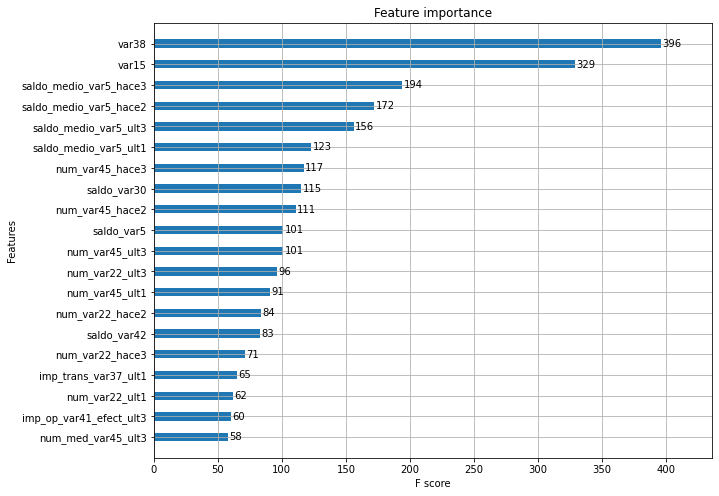

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# LightGBM

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [9]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500, device='gpu')#, tree_method='gpu_hist', predictor='gpu_predictor')

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

LightGBMError: GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1

In [42]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=500, tree_method='gpu_hist', predictor='gpu_predictor')

params = {'num_leaves':[32, 64], 'max_depth':[128, 160], 'min_child_samples':[60, 100], 'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(LGBM_clf, param_grid=params, cv=5)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print(f'GridSearchCV 최적 파라미터: {gridcv.best_params_}')
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1075: UserWarning: predictor keyword has been found in `params` and will be ignored.
Please use predictor argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logl

[40]	valid_0's auc: 0.884437	valid_0's binary_logloss: 0.121112	valid_1's auc: 0.836834	valid_1's binary_logloss: 0.139996
Early stopping, best iteration is:
[10]	valid_0's auc: 0.85489	valid_0's binary_logloss: 0.134153	valid_1's auc: 0.839913	valid_1's binary_logloss: 0.144571
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.825972	valid_0's binary_logloss: 0.15626	valid_1's auc: 0.817426	valid_1's binary_logloss: 0.165002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830735	valid_0's binary_logloss: 0.150869	valid_1's auc: 0.821832	valid_1's binary_logloss: 0.159685
[3]	valid_0's auc: 0.836213	valid_0's binary_logloss: 0.147022	valid_1's auc: 0.825847	valid_1's binary_logloss: 0.156023
[4]	valid_0's auc: 0.839911	valid_0's binary_logloss: 0.143985	valid_1's auc: 0.830159	valid_1's binary_logloss: 0.153298
[5]	valid_0's auc: 0.842712	valid_0's binary_logloss: 0.14152	valid_1'

[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc:

[60]	valid_0's auc: 0.896178	valid_0's binary_logloss: 0.116313	valid_1's auc: 0.838833	valid_1's binary_logloss: 0.1396
Early stopping, best iteration is:
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's 

[23]	valid_0's auc: 0.869182	valid_0's binary_logloss: 0.126269	valid_1's auc: 0.836587	valid_1's binary_logloss: 0.140588
[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's au

[22]	valid_0's auc: 0.869367	valid_0's binary_logloss: 0.126428	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.140242
[23]	valid_0's auc: 0.870018	valid_0's binary_logloss: 0.126051	valid_1's auc: 0.838851	valid_1's binary_logloss: 0.140113
[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc:

Early stopping, best iteration is:
[30]	valid_0's auc: 0.878569	valid_0's binary_logloss: 0.123249	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.139479
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1'

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840688	valid_0's binary_logloss: 0.14972	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.159538
[3]	valid_0's auc: 0.847811	valid_0's binary_logloss: 0.145576	valid_1's auc: 0.832086	valid_1's binary_logloss: 0.155889
[4]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.142266	valid_1's auc: 0.83348	valid_1's binary_logloss: 0.153059
[5]	valid_0's auc: 0.856853	valid_0's binary_logloss: 0.139575	valid_1's auc: 0.837158	valid_1's binary_logloss: 0.150847
[6]	valid_0's auc: 0.859779	valid_0's binary_logloss: 0.13732	valid_1's auc: 0.839471	valid_1's binary_logloss: 0.148924
[7]	valid_0's auc: 0.861819	valid_0's binary_logloss: 0.135402	valid_1's auc: 0.838324	valid_1's binary_loglo

[28]	valid_0's auc: 0.896969	valid_0's binary_logloss: 0.11709	valid_1's auc: 0.840437	valid_1's binary_logloss: 0.139222
[29]	valid_0's auc: 0.898028	valid_0's binary_logloss: 0.116618	valid_1's auc: 0.840857	valid_1's binary_logloss: 0.139136
[30]	valid_0's auc: 0.89908	valid_0's binary_logloss: 0.116142	valid_1's auc: 0.840827	valid_1's binary_logloss: 0.139074
[31]	valid_0's auc: 0.900145	valid_0's binary_logloss: 0.115699	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.138987
[32]	valid_0's auc: 0.90112	valid_0's binary_logloss: 0.115215	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.139024
[33]	valid_0's auc: 0.901846	valid_0's binary_logloss: 0.114793	valid_1's auc: 0.840933	valid_1's binary_logloss: 0.13904
[34]	valid_0's auc: 0.902883	valid_0's binary_logloss: 0.114387	valid_1's auc: 0.840844	valid_1's binary_logloss: 0.139066
[35]	valid_0's auc: 0.903648	valid_0's binary_logloss: 0.113998	valid_1's auc: 0.84075	valid_1's binary_logloss: 0.13901
[36]	valid_0's auc: 0.

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.832082	valid_0's binary_logloss: 0.155469	valid_1's auc: 0.814834	valid_1's binary_logloss: 0.164811
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840358	valid_0's binary_logloss: 0.149705	valid_1's auc: 0.821	valid_1's binary_logloss: 0.159739
[3]	valid_0's auc: 0.846958	valid_0's binary_logloss: 0.145462	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.155963
[4]	valid_0's auc: 0.850608	valid_0's binary_logloss: 0.142192	valid_1's auc: 0.830664	valid_1's binary_logloss: 0.153305
[5]	valid_0's auc: 0.857054	valid_0's binary_logloss: 0.139496	valid_1's auc: 0.834255	valid_1's binary_logloss: 0.150999
[6]	valid_0's auc: 0.860917	valid_0's binary_logloss: 0.137183	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.149102
[7]	valid_0's auc: 0.862765	valid_0's binary_logloss: 0.135234	valid_1's auc: 0.838397	valid_1's binary_logl

[31]	valid_0's auc: 0.89958	valid_0's binary_logloss: 0.115802	valid_1's auc: 0.837327	valid_1's binary_logloss: 0.139384
[32]	valid_0's auc: 0.900529	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836541	valid_1's binary_logloss: 0.139496
[33]	valid_0's auc: 0.90188	valid_0's binary_logloss: 0.114972	valid_1's auc: 0.837021	valid_1's binary_logloss: 0.139413
[34]	valid_0's auc: 0.902879	valid_0's binary_logloss: 0.114528	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.13943
[35]	valid_0's auc: 0.903932	valid_0's binary_logloss: 0.114157	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.139458
[36]	valid_0's auc: 0.904707	valid_0's binary_logloss: 0.113777	valid_1's auc: 0.836824	valid_1's binary_logloss: 0.139459
[37]	valid_0's auc: 0.905376	valid_0's binary_logloss: 0.113446	valid_1's auc: 0.836614	valid_1's binary_logloss: 0.139503
[38]	valid_0's auc: 0.906535	valid_0's binary_logloss: 0.11295	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139575
[39]	valid_0's auc: 

[16]	valid_0's auc: 0.882066	valid_0's binary_logloss: 0.1244	valid_1's auc: 0.841461	valid_1's binary_logloss: 0.140813
[17]	valid_0's auc: 0.883582	valid_0's binary_logloss: 0.123652	valid_1's auc: 0.841626	valid_1's binary_logloss: 0.1405
[18]	valid_0's auc: 0.884494	valid_0's binary_logloss: 0.122936	valid_1's auc: 0.841739	valid_1's binary_logloss: 0.140193
[19]	valid_0's auc: 0.885618	valid_0's binary_logloss: 0.122288	valid_1's auc: 0.841595	valid_1's binary_logloss: 0.140038
[20]	valid_0's auc: 0.887262	valid_0's binary_logloss: 0.12156	valid_1's auc: 0.841475	valid_1's binary_logloss: 0.13984
[21]	valid_0's auc: 0.888549	valid_0's binary_logloss: 0.120864	valid_1's auc: 0.841698	valid_1's binary_logloss: 0.139644
[22]	valid_0's auc: 0.889783	valid_0's binary_logloss: 0.120226	valid_1's auc: 0.841265	valid_1's binary_logloss: 0.139524
[23]	valid_0's auc: 0.891007	valid_0's binary_logloss: 0.119647	valid_1's auc: 0.840909	valid_1's binary_logloss: 0.139463
[24]	valid_0's auc: 0.

[39]	valid_0's auc: 0.882176	valid_0's binary_logloss: 0.121925	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.13977
[40]	valid_0's auc: 0.882818	valid_0's binary_logloss: 0.121683	valid_1's auc: 0.835332	valid_1's binary_logloss: 0.139736
[41]	valid_0's auc: 0.883353	valid_0's binary_logloss: 0.121428	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.139663
[42]	valid_0's auc: 0.884062	valid_0's binary_logloss: 0.121195	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.139727
[43]	valid_0's auc: 0.884607	valid_0's binary_logloss: 0.120984	valid_1's auc: 0.835083	valid_1's binary_logloss: 0.139745
[44]	valid_0's auc: 0.885155	valid_0's binary_logloss: 0.120752	valid_1's auc: 0.835153	valid_1's binary_logloss: 0.139761
Early stopping, best iteration is:
[14]	valid_0's auc: 0.859797	valid_0's binary_logloss: 0.130869	valid_1's auc: 0.839774	valid_1's binary_logloss: 0.141886
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]

[20]	valid_0's auc: 0.8663	valid_0's binary_logloss: 0.12769	valid_1's auc: 0.83863	valid_1's binary_logloss: 0.140304
[21]	valid_0's auc: 0.867585	valid_0's binary_logloss: 0.127262	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.14013
[22]	valid_0's auc: 0.868709	valid_0's binary_logloss: 0.126813	valid_1's auc: 0.839171	valid_1's binary_logloss: 0.14001
[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873

[40]	valid_0's auc: 0.88064	valid_0's binary_logloss: 0.122051	valid_1's auc: 0.840237	valid_1's binary_logloss: 0.139001
[41]	valid_0's auc: 0.88151	valid_0's binary_logloss: 0.121784	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.13906
[42]	valid_0's auc: 0.882288	valid_0's binary_logloss: 0.121573	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139089
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856046	valid_0's binary_logloss: 0.132732	valid_1's auc: 0.840999	valid_1's binary_logloss: 0.142898
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1

[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1

[20]	valid_0's auc: 0.865345	valid_0's binary_logloss: 0.12787	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.140905
[21]	valid_0's auc: 0.866373	valid_0's binary_logloss: 0.127496	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.140637
[22]	valid_0's auc: 0.867435	valid_0's binary_logloss: 0.12708	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.1406
[23]	valid_0's auc: 0.868304	valid_0's binary_logloss: 0.12669	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.140434
[24]	valid_0's auc: 0.869271	valid_0's binary_logloss: 0.126307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.140281
[25]	valid_0's auc: 0.870212	valid_0's binary_logloss: 0.125949	valid_1's auc: 0.837555	valid_1's binary_logloss: 0.14025
[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_l

[37]	valid_0's auc: 0.882368	valid_0's binary_logloss: 0.122305	valid_1's auc: 0.844143	valid_1's binary_logloss: 0.138162
[38]	valid_0's auc: 0.882945	valid_0's binary_logloss: 0.122019	valid_1's auc: 0.844149	valid_1's binary_logloss: 0.13813
[39]	valid_0's auc: 0.883584	valid_0's binary_logloss: 0.121799	valid_1's auc: 0.843977	valid_1's binary_logloss: 0.138149
[40]	valid_0's auc: 0.88416	valid_0's binary_logloss: 0.121576	valid_1's auc: 0.844146	valid_1's binary_logloss: 0.138147
[41]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.12135	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138128
[42]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138106
[43]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.120905	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.138052
[44]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120678	valid_1's auc: 0.844103	valid_1's binary_logloss: 0.138065
[45]	valid_0's auc:

[31]	valid_0's auc: 0.894983	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.140402
[32]	valid_0's auc: 0.896347	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.14049
[33]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.116696	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.140462
[34]	valid_0's auc: 0.898503	valid_0's binary_logloss: 0.116337	valid_1's auc: 0.831998	valid_1's binary_logloss: 0.140436
[35]	valid_0's auc: 0.899431	valid_0's binary_logloss: 0.115966	valid_1's auc: 0.832323	valid_1's binary_logloss: 0.140357
[36]	valid_0's auc: 0.900259	valid_0's binary_logloss: 0.115619	valid_1's auc: 0.832052	valid_1's binary_logloss: 0.140411
[37]	valid_0's auc: 0.901414	valid_0's binary_logloss: 0.115269	valid_1's auc: 0.832144	valid_1's binary_logloss: 0.14042
[38]	valid_0's auc: 0.902365	valid_0's binary_logloss: 0.114862	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.140464
[39]	valid_0's auc

[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc:

[44]	valid_0's auc: 0.903084	valid_0's binary_logloss: 0.113909	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.140037
[45]	valid_0's auc: 0.903622	valid_0's binary_logloss: 0.113641	valid_1's auc: 0.83651	valid_1's binary_logloss: 0.140106
[46]	valid_0's auc: 0.904201	valid_0's binary_logloss: 0.113301	valid_1's auc: 0.83619	valid_1's binary_logloss: 0.140186
[47]	valid_0's auc: 0.904762	valid_0's binary_logloss: 0.112961	valid_1's auc: 0.836219	valid_1's binary_logloss: 0.14019
[48]	valid_0's auc: 0.905387	valid_0's binary_logloss: 0.11272	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.140252
[49]	valid_0's auc: 0.90574	valid_0's binary_logloss: 0.112462	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140337
[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0

[64]	valid_0's auc: 0.916522	valid_0's binary_logloss: 0.10698	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.140446
[65]	valid_0's auc: 0.917048	valid_0's binary_logloss: 0.106704	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.140528
[66]	valid_0's auc: 0.917714	valid_0's binary_logloss: 0.1065	valid_1's auc: 0.836017	valid_1's binary_logloss: 0.140589
[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best i

[16]	valid_0's auc: 0.875071	valid_0's binary_logloss: 0.126463	valid_1's auc: 0.838328	valid_1's binary_logloss: 0.141336
[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0

[31]	valid_0's auc: 0.896336	valid_0's binary_logloss: 0.117289	valid_1's auc: 0.838384	valid_1's binary_logloss: 0.139687
[32]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.116901	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139683
[33]	valid_0's auc: 0.898375	valid_0's binary_logloss: 0.116464	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.139636
[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc

[42]	valid_0's auc: 0.885392	valid_0's binary_logloss: 0.120617	valid_1's auc: 0.835944	valid_1's binary_logloss: 0.139624
Early stopping, best iteration is:
[12]	valid_0's auc: 0.856101	valid_0's binary_logloss: 0.13225	valid_1's auc: 0.840855	valid_1's binary_logloss: 0.142715
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.821268	valid_0's binary_logloss: 0.156277	valid_1's auc: 0.816814	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828863	valid_0's binary_logloss: 0.151005	valid_1's auc: 0.821376	valid_1's binary_logloss: 0.159886
[3]	valid_0's auc: 0.837474	valid_0's binary_logloss: 0.147149	valid_1's auc: 0.828229	valid_1's binary_logloss: 0.156519
[4]	valid_0's auc: 0.842962	valid_0's binary_logloss: 0.144152	valid_1's auc: 0.829952	valid_1's binary_logloss: 0.153687
[5]	valid_0's auc: 0.84635	valid_0's binary_logloss: 0.141643	valid_1

[1]	valid_0's auc: 0.823422	valid_0's binary_logloss: 0.156446	valid_1's auc: 0.819043	valid_1's binary_logloss: 0.165337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830391	valid_0's binary_logloss: 0.151103	valid_1's auc: 0.82466	valid_1's binary_logloss: 0.160151
[3]	valid_0's auc: 0.836251	valid_0's binary_logloss: 0.14724	valid_1's auc: 0.829717	valid_1's binary_logloss: 0.156452
[4]	valid_0's auc: 0.842516	valid_0's binary_logloss: 0.144162	valid_1's auc: 0.832695	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.846316	valid_0's binary_logloss: 0.141636	valid_1's auc: 0.834705	valid_1's binary_logloss: 0.151246
[6]	valid_0's auc: 0.847998	valid_0's binary_logloss: 0.139517	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.149374
[7]	valid_0's auc: 0.849074	valid_0's binary_logloss: 0.13782	valid_1's auc: 0.838333	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.85	valid_0's binary_logloss: 0.136391	valid_1's auc: 0.838986	valid_

[21]	valid_0's auc: 0.868281	valid_0's binary_logloss: 0.126821	valid_1's auc: 0.83842	valid_1's binary_logloss: 0.140081
[22]	valid_0's auc: 0.869333	valid_0's binary_logloss: 0.126397	valid_1's auc: 0.838291	valid_1's binary_logloss: 0.139941
[23]	valid_0's auc: 0.870664	valid_0's binary_logloss: 0.125953	valid_1's auc: 0.837637	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.871541	valid_0's binary_logloss: 0.125585	valid_1's auc: 0.837144	valid_1's binary_logloss: 0.139915
[25]	valid_0's auc: 0.872827	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837438	valid_1's binary_logloss: 0.139775
[26]	valid_0's auc: 0.873522	valid_0's binary_logloss: 0.12487	valid_1's auc: 0.83729	valid_1's binary_logloss: 0.139751
[27]	valid_0's auc: 0.874428	valid_0's binary_logloss: 0.124521	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.139667
[28]	valid_0's auc: 0.875453	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.836916	valid_1's binary_logloss: 0.139693
[29]	valid_0's auc:

[22]	valid_0's auc: 0.86837	valid_0's binary_logloss: 0.126354	valid_1's auc: 0.838279	valid_1's binary_logloss: 0.139978
[23]	valid_0's auc: 0.869587	valid_0's binary_logloss: 0.125905	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139909
[24]	valid_0's auc: 0.870532	valid_0's binary_logloss: 0.125527	valid_1's auc: 0.838429	valid_1's binary_logloss: 0.139818
[25]	valid_0's auc: 0.871628	valid_0's binary_logloss: 0.125118	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.139768
[26]	valid_0's auc: 0.872816	valid_0's binary_logloss: 0.12478	valid_1's auc: 0.838203	valid_1's binary_logloss: 0.139683
[27]	valid_0's auc: 0.873647	valid_0's binary_logloss: 0.124448	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139669
[28]	valid_0's auc: 0.874326	valid_0's binary_logloss: 0.124117	valid_1's auc: 0.837756	valid_1's binary_logloss: 0.139635
[29]	valid_0's auc: 0.875069	valid_0's binary_logloss: 0.123826	valid_1's auc: 0.838037	valid_1's binary_logloss: 0.139565
[30]	valid_0's auc:

[22]	valid_0's auc: 0.870971	valid_0's binary_logloss: 0.126075	valid_1's auc: 0.840789	valid_1's binary_logloss: 0.140251
[23]	valid_0's auc: 0.872384	valid_0's binary_logloss: 0.125599	valid_1's auc: 0.840267	valid_1's binary_logloss: 0.14022
[24]	valid_0's auc: 0.873433	valid_0's binary_logloss: 0.125215	valid_1's auc: 0.840763	valid_1's binary_logloss: 0.140023
[25]	valid_0's auc: 0.874094	valid_0's binary_logloss: 0.124834	valid_1's auc: 0.840782	valid_1's binary_logloss: 0.139927
[26]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.12446	valid_1's auc: 0.840852	valid_1's binary_logloss: 0.139864
[27]	valid_0's auc: 0.875863	valid_0's binary_logloss: 0.124178	valid_1's auc: 0.840905	valid_1's binary_logloss: 0.139751
[28]	valid_0's auc: 0.876477	valid_0's binary_logloss: 0.123899	valid_1's auc: 0.840828	valid_1's binary_logloss: 0.139688
[29]	valid_0's auc: 0.877436	valid_0's binary_logloss: 0.123585	valid_1's auc: 0.840653	valid_1's binary_logloss: 0.139596
[30]	valid_0's auc

[31]	valid_0's auc: 0.898365	valid_0's binary_logloss: 0.116187	valid_1's auc: 0.836258	valid_1's binary_logloss: 0.139893
[32]	valid_0's auc: 0.899428	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139825
[33]	valid_0's auc: 0.900129	valid_0's binary_logloss: 0.115374	valid_1's auc: 0.836132	valid_1's binary_logloss: 0.139815
[34]	valid_0's auc: 0.900819	valid_0's binary_logloss: 0.115047	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.139786
[35]	valid_0's auc: 0.901929	valid_0's binary_logloss: 0.114682	valid_1's auc: 0.836241	valid_1's binary_logloss: 0.139758
[36]	valid_0's auc: 0.902923	valid_0's binary_logloss: 0.114287	valid_1's auc: 0.836594	valid_1's binary_logloss: 0.139739
[37]	valid_0's auc: 0.903583	valid_0's binary_logloss: 0.113893	valid_1's auc: 0.836319	valid_1's binary_logloss: 0.139831
[38]	valid_0's auc: 0.904289	valid_0's binary_logloss: 0.113536	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139874
[39]	valid_0's a

[16]	valid_0's auc: 0.87963	valid_0's binary_logloss: 0.124439	valid_1's auc: 0.836006	valid_1's binary_logloss: 0.140886
[17]	valid_0's auc: 0.881659	valid_0's binary_logloss: 0.123628	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.140605
[18]	valid_0's auc: 0.882607	valid_0's binary_logloss: 0.122935	valid_1's auc: 0.836156	valid_1's binary_logloss: 0.140354
[19]	valid_0's auc: 0.884204	valid_0's binary_logloss: 0.122205	valid_1's auc: 0.836909	valid_1's binary_logloss: 0.140094
[20]	valid_0's auc: 0.88564	valid_0's binary_logloss: 0.121562	valid_1's auc: 0.836976	valid_1's binary_logloss: 0.139982
[21]	valid_0's auc: 0.886788	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.139793
[22]	valid_0's auc: 0.888424	valid_0's binary_logloss: 0.120314	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.139623
[23]	valid_0's auc: 0.889756	valid_0's binary_logloss: 0.119797	valid_1's auc: 0.837015	valid_1's binary_logloss: 0.139653
[24]	valid_0's auc: 

[44]	valid_0's auc: 0.908965	valid_0's binary_logloss: 0.111555	valid_1's auc: 0.836825	valid_1's binary_logloss: 0.140052
[45]	valid_0's auc: 0.90954	valid_0's binary_logloss: 0.111283	valid_1's auc: 0.836509	valid_1's binary_logloss: 0.140134
[46]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.111029	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140137
[47]	valid_0's auc: 0.910771	valid_0's binary_logloss: 0.110662	valid_1's auc: 0.836357	valid_1's binary_logloss: 0.140222
Early stopping, best iteration is:
[17]	valid_0's auc: 0.88003	valid_0's binary_logloss: 0.124299	valid_1's auc: 0.840327	valid_1's binary_logloss: 0.140902
[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.833594	valid_0's binary_logloss: 0.155635	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846048	valid_0's binary_logloss: 0.149713	vali

[18]	valid_0's auc: 0.882597	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.836645	valid_1's binary_logloss: 0.140956
[19]	valid_0's auc: 0.884069	valid_0's binary_logloss: 0.1225	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140747
[20]	valid_0's auc: 0.885553	valid_0's binary_logloss: 0.121835	valid_1's auc: 0.837335	valid_1's binary_logloss: 0.140578
[21]	valid_0's auc: 0.886758	valid_0's binary_logloss: 0.121199	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.1405
[22]	valid_0's auc: 0.888245	valid_0's binary_logloss: 0.120566	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.140423
[23]	valid_0's auc: 0.889287	valid_0's binary_logloss: 0.119999	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140319
[24]	valid_0's auc: 0.890242	valid_0's binary_logloss: 0.119535	valid_1's auc: 0.837226	valid_1's binary_logloss: 0.140192
[25]	valid_0's auc: 0.89128	valid_0's binary_logloss: 0.119025	valid_1's auc: 0.836975	valid_1's binary_logloss: 0.140152
[26]	valid_0's auc: 0

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss: 0.139314	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.150218
[6]	valid_0's auc: 0.860698	valid_0's binary_logloss: 0.137026	valid_1's auc: 0.837977	valid_1's binary_logloss: 0.148376
[7]	valid_0's auc: 0.863515	valid_0's binary_logloss: 0.135113	valid_1's auc: 0.838443	valid_1's binary_log

[32]	valid_0's auc: 0.898643	valid_0's binary_logloss: 0.11607	valid_1's auc: 0.836864	valid_1's binary_logloss: 0.139923
[33]	valid_0's auc: 0.89992	valid_0's binary_logloss: 0.115645	valid_1's auc: 0.837133	valid_1's binary_logloss: 0.139915
[34]	valid_0's auc: 0.900901	valid_0's binary_logloss: 0.115264	valid_1's auc: 0.836791	valid_1's binary_logloss: 0.139982
[35]	valid_0's auc: 0.901751	valid_0's binary_logloss: 0.114906	valid_1's auc: 0.836687	valid_1's binary_logloss: 0.139951
[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.90

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.823879	valid_0's binary_logloss: 0.156213	valid_1's auc: 0.821528	valid_1's binary_logloss: 0.16489
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829817	valid_0's binary_logloss: 0.151021	valid_1's auc: 0.825621	valid_1's binary_logloss: 0.159697
[3]	valid_0's auc: 0.835232	valid_0's binary_logloss: 0.147177	valid_1's auc: 0.827536	valid_1's binary_logloss: 0.156048
[4]	valid_0's auc: 0.83968	valid_0's binary_logloss: 0.144169	valid_1's auc: 0.829988	valid_1's binary_logloss: 0.15317
[5]	valid_0's auc: 0.842369	valid_0's binary_logloss: 0.141776	valid_1's auc: 0.832821	valid_1's binary_logloss: 0.150835
[6]	valid_0's auc: 0.845358	valid_0's binary_logloss: 0.13981	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.148944
[7]	valid_0's auc: 0.847188	valid_0's binary_logloss: 0.13809	valid_1's auc: 0.836752	valid_1's binary_loglos

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_l

[21]	valid_0's auc: 0.867294	valid_0's binary_logloss: 0.127271	valid_1's auc: 0.838068	valid_1's binary_logloss: 0.140114
[22]	valid_0's auc: 0.868689	valid_0's binary_logloss: 0.126832	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.139969
[23]	valid_0's auc: 0.869773	valid_0's binary_logloss: 0.126451	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.139931
[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.832276	valid_0's binary_logloss: 0.151075	valid_1's auc: 0.819879	valid_1's binary_logloss: 0.160057
[3]	valid_0's auc: 0.836968	valid_0's binary_logloss: 0.147259	valid_1's auc: 0.825144	valid_1's binary_logloss: 0.156367
[4]	valid_0's auc: 0.840937	valid_0's binary_logloss: 0.144237	valid_1's auc: 0.830372	valid_1's binary_logloss: 0.153364
[5]	valid_0's auc: 0.845178	valid_0's binary_logloss: 0.141851	valid_1's auc: 0.835122	valid_1's binary_logloss: 0.151017
[6]	valid_0's auc: 0.846202	valid_0's binary_logloss: 0.139881	valid_1's auc: 0.835139	valid_1's binary_logloss: 0.149202
[7]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.13816	valid_1's auc: 0.838439	valid_1's binary_log

[22]	valid_0's auc: 0.867081	valid_0's binary_logloss: 0.12726	valid_1's auc: 0.840315	valid_1's binary_logloss: 0.139758
[23]	valid_0's auc: 0.867656	valid_0's binary_logloss: 0.126888	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139751
[24]	valid_0's auc: 0.868511	valid_0's binary_logloss: 0.12652	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.13964
[25]	valid_0's auc: 0.869233	valid_0's binary_logloss: 0.126158	valid_1's auc: 0.840131	valid_1's binary_logloss: 0.139495
[26]	valid_0's auc: 0.870146	valid_0's binary_logloss: 0.12583	valid_1's auc: 0.839809	valid_1's binary_logloss: 0.139487
[27]	valid_0's auc: 0.871289	valid_0's binary_logloss: 0.125495	valid_1's auc: 0.83977	valid_1's binary_logloss: 0.139452
[28]	valid_0's auc: 0.872449	valid_0's binary_logloss: 0.125203	valid_1's auc: 0.839707	valid_1's binary_logloss: 0.139417
[29]	valid_0's auc: 0.87307	valid_0's binary_logloss: 0.124902	valid_1's auc: 0.840062	valid_1's binary_logloss: 0.13934
[30]	valid_0's auc: 0.8

[60]	valid_0's auc: 0.894754	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.843942	valid_1's binary_logloss: 0.138136
[61]	valid_0's auc: 0.895224	valid_0's binary_logloss: 0.117358	valid_1's auc: 0.844107	valid_1's binary_logloss: 0.138135
[62]	valid_0's auc: 0.895747	valid_0's binary_logloss: 0.117116	valid_1's auc: 0.844033	valid_1's binary_logloss: 0.138143
[63]	valid_0's auc: 0.896042	valid_0's binary_logloss: 0.116934	valid_1's auc: 0.844057	valid_1's binary_logloss: 0.138188
[64]	valid_0's auc: 0.89648	valid_0's binary_logloss: 0.116742	valid_1's auc: 0.843882	valid_1's binary_logloss: 0.138258
[65]	valid_0's auc: 0.8968	valid_0's binary_logloss: 0.116596	valid_1's auc: 0.843553	valid_1's binary_logloss: 0.138317
[66]	valid_0's auc: 0.89727	valid_0's binary_logloss: 0.116455	valid_1's auc: 0.843435	valid_1's binary_logloss: 0.138362
[67]	valid_0's auc: 0.897643	valid_0's binary_logloss: 0.11627	valid_1's auc: 0.843148	valid_1's binary_logloss: 0.138424
[68]	valid_0's auc: 0

[17]	valid_0's auc: 0.879493	valid_0's binary_logloss: 0.125166	valid_1's auc: 0.834462	valid_1's binary_logloss: 0.141684
[18]	valid_0's auc: 0.880697	valid_0's binary_logloss: 0.124485	valid_1's auc: 0.834855	valid_1's binary_logloss: 0.141381
[19]	valid_0's auc: 0.881751	valid_0's binary_logloss: 0.123851	valid_1's auc: 0.83548	valid_1's binary_logloss: 0.141089
[20]	valid_0's auc: 0.883208	valid_0's binary_logloss: 0.123231	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.141074
[21]	valid_0's auc: 0.884441	valid_0's binary_logloss: 0.122672	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.140871
[22]	valid_0's auc: 0.885795	valid_0's binary_logloss: 0.122047	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.140833
[23]	valid_0's auc: 0.88703	valid_0's binary_logloss: 0.121437	valid_1's auc: 0.834867	valid_1's binary_logloss: 0.14067
[24]	valid_0's auc: 0.888628	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.140607
[25]	valid_0's auc:

[17]	valid_0's auc: 0.87671	valid_0's binary_logloss: 0.125734	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.140993
[18]	valid_0's auc: 0.877745	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.838826	valid_1's binary_logloss: 0.140774
[19]	valid_0's auc: 0.87955	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.838685	valid_1's binary_logloss: 0.14062
[20]	valid_0's auc: 0.88095	valid_0's binary_logloss: 0.123758	valid_1's auc: 0.839472	valid_1's binary_logloss: 0.140278
[21]	valid_0's auc: 0.882333	valid_0's binary_logloss: 0.123172	valid_1's auc: 0.839953	valid_1's binary_logloss: 0.139987
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[23]	valid_0's auc: 0.884939	valid_0's binary_logloss: 0.122106	valid_1's auc: 0.840085	valid_1's binary_logloss: 0.139652
[24]	valid_0's auc: 0.886267	valid_0's binary_logloss: 0.121544	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.13967
[25]	valid_0's auc: 0.

[32]	valid_0's auc: 0.897473	valid_0's binary_logloss: 0.116901	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139683
[33]	valid_0's auc: 0.898375	valid_0's binary_logloss: 0.116464	valid_1's auc: 0.838512	valid_1's binary_logloss: 0.139636
[34]	valid_0's auc: 0.899242	valid_0's binary_logloss: 0.116054	valid_1's auc: 0.838475	valid_1's binary_logloss: 0.139614
[35]	valid_0's auc: 0.900316	valid_0's binary_logloss: 0.115653	valid_1's auc: 0.838522	valid_1's binary_logloss: 0.13957
[36]	valid_0's auc: 0.901114	valid_0's binary_logloss: 0.11531	valid_1's auc: 0.838721	valid_1's binary_logloss: 0.139537
[37]	valid_0's auc: 0.901919	valid_0's binary_logloss: 0.114911	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139581
[38]	valid_0's auc: 0.902827	valid_0's binary_logloss: 0.114566	valid_1's auc: 0.839027	valid_1's binary_logloss: 0.139517
[39]	valid_0's auc: 0.903647	valid_0's binary_logloss: 0.114176	valid_1's auc: 0.839264	valid_1's binary_logloss: 0.13948
[40]	valid_0's auc:

[30]	valid_0's auc: 0.894193	valid_0's binary_logloss: 0.118022	valid_1's auc: 0.831601	valid_1's binary_logloss: 0.140412
[31]	valid_0's auc: 0.894983	valid_0's binary_logloss: 0.117589	valid_1's auc: 0.831496	valid_1's binary_logloss: 0.140402
[32]	valid_0's auc: 0.896347	valid_0's binary_logloss: 0.117114	valid_1's auc: 0.831512	valid_1's binary_logloss: 0.14049
[33]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.116696	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.140462
[34]	valid_0's auc: 0.898503	valid_0's binary_logloss: 0.116337	valid_1's auc: 0.831998	valid_1's binary_logloss: 0.140436
[35]	valid_0's auc: 0.899431	valid_0's binary_logloss: 0.115966	valid_1's auc: 0.832323	valid_1's binary_logloss: 0.140357
[36]	valid_0's auc: 0.900259	valid_0's binary_logloss: 0.115619	valid_1's auc: 0.832052	valid_1's binary_logloss: 0.140411
[37]	valid_0's auc: 0.901414	valid_0's binary_logloss: 0.115269	valid_1's auc: 0.832144	valid_1's binary_logloss: 0.14042
[38]	valid_0's auc

[17]	valid_0's auc: 0.87775	valid_0's binary_logloss: 0.125008	valid_1's auc: 0.836212	valid_1's binary_logloss: 0.140988
[18]	valid_0's auc: 0.879171	valid_0's binary_logloss: 0.124326	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.140636
[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc:

[46]	valid_0's auc: 0.904201	valid_0's binary_logloss: 0.113301	valid_1's auc: 0.83619	valid_1's binary_logloss: 0.140186
[47]	valid_0's auc: 0.904762	valid_0's binary_logloss: 0.112961	valid_1's auc: 0.836219	valid_1's binary_logloss: 0.14019
[48]	valid_0's auc: 0.905387	valid_0's binary_logloss: 0.11272	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.140252
[49]	valid_0's auc: 0.90574	valid_0's binary_logloss: 0.112462	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140337
[50]	valid_0's auc: 0.906329	valid_0's binary_logloss: 0.112158	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140395
[51]	valid_0's auc: 0.906807	valid_0's binary_logloss: 0.111885	valid_1's auc: 0.835957	valid_1's binary_logloss: 0.140381
[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logl

[LightGBM] [Warning] Unknown parameter: predictor
[LightGBM] [Warning] Unknown parameter: tree_method
[1]	training's auc: 0.823615	training's binary_logloss: 0.15611	valid_1's auc: 0.816534	valid_1's binary_logloss: 0.165167
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.828024	training's binary_logloss: 0.150857	valid_1's auc: 0.81932	valid_1's binary_logloss: 0.160019
[3]	training's auc: 0.837813	training's binary_logloss: 0.146978	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.156362
[4]	training's auc: 0.843266	training's binary_logloss: 0.143948	valid_1's auc: 0.833269	valid_1's binary_logloss: 0.153469
[5]	training's auc: 0.845655	training's binary_logloss: 0.141503	valid_1's auc: 0.83486	valid_1's binary_logloss: 0.151262
[6]	training's auc: 0.847931	training's binary_logloss: 0.139443	valid_1's auc: 0.836656	valid_1's binary_logloss: 0.149439
[7]	training's auc: 0.851488	training's binary_logloss: 0.137661	valid_1's auc: 0.838769	valid_1

In [46]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.1

In [44]:

print(f'GridSearchCV 최적의 하이퍼 파라미터: {gridcv.best_params_}')
print(f'GridSearchCV 최고 정확도: {gridcv.best_score_:.4f}')
best_lgbmclf = gridcv.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
# dpredictions = best_lgbmclf.predict(X_test)
lgbm_roc_score = roc_auc_score(y_test, best_lgbmclf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:.4f}')

GridSearchCV 최적의 하이퍼 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}
GridSearchCV 최고 정확도: 0.9610
ROC AUC: 0.8418
